In [13]:
!pip install ultralytics

In [14]:
from ultralytics import YOLO
import os
import cv2
from google.colab.patches import cv2_imshow

model = YOLO('yolov8n.pt')

In [15]:
def detect_and_visualize(image_path, model):
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return

    print(f"Detecting and visualizing objects in {image_path}...")

    results = model(image_path)

    img = cv2.imread(image_path)

    # Process and draw results
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = [int(i) for i in box.xyxy[0]]

            class_id = int(box.cls)
            confidence = box.conf.item()

            class_name = model.names[class_id]

            color = (0, 255, 0)
            thickness = 2
            cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

            label = f"{class_name}: {confidence:.2f}"
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.8
            font_thickness = 2
            text_size, _ = cv2.getTextSize(label, font, font_scale, font_thickness)
            text_x = x1
            text_y = y1 - 10

            if text_y < 0:
                text_y = y1 + text_size[1] + 10

            cv2.putText(img, label, (text_x, text_y), font, font_scale, color, font_thickness)

    cv2_imshow(img)

Detecting and visualizing objects in /content/Salmanrampwalk.png.webp...

image 1/1 /content/Salmanrampwalk.png.webp: 640x416 1 person, 194.6ms
Speed: 4.9ms preprocess, 194.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 416)


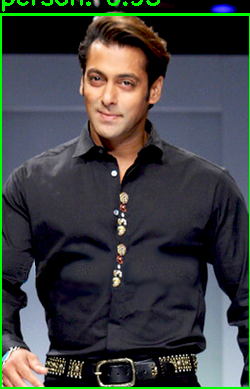

In [18]:
detect_and_visualize('/content/Salmanrampwalk.png.webp', model)

Detecting and visualizing objects in /content/images (1).jpeg...

image 1/1 /content/images (1).jpeg: 480x640 4 elephants, 327.7ms
Speed: 5.0ms preprocess, 327.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


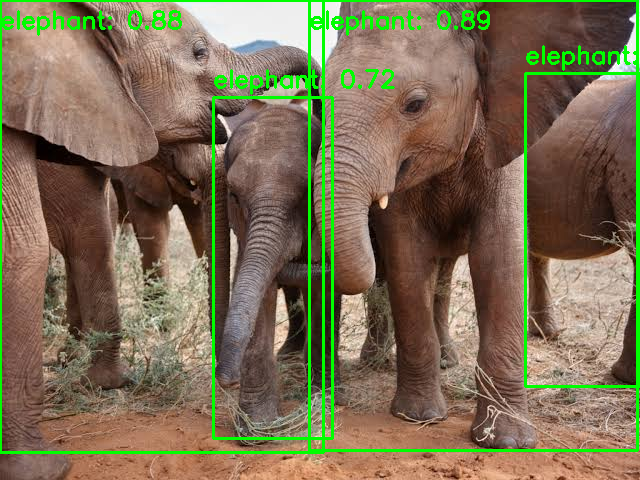

In [20]:
detect_and_visualize('/content/images (1).jpeg', model)